# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import trange
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("/kaggle/input/cs-215-assignment-3-multiple-variate-regression/train.csv")
df.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,639.0,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.402948,0.409261,31.274591,4418.44126
1,1,124.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.500438,0.445494,34.467567,5862.80545
2,2,485.0,25.0,0.50,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.509001,0.459421,36.624966,6079.08526
3,3,324.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.583379,0.498056,40.865478,7400.77538
4,4,235.0,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.447669,0.423764,33.298861,4858.24073


In [3]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.000000,-0.000774,0.001790,-0.010369,0.003479,-0.008047,0.001275,-0.013105,-0.013323,-0.013245,-0.012896,-0.013187,-0.013037,-0.004391,-0.003488,-0.003413,-0.006497,-0.005219,-0.000304
Row#,-0.000774,1.000000,0.559859,0.394832,0.458137,0.421085,0.399241,-0.015823,-0.015771,-0.015757,-0.015661,-0.015803,-0.015804,0.003571,0.002850,-0.034197,-0.039108,-0.043635,-0.030721
clonesize,0.001790,0.559859,1.000000,0.422721,0.066754,0.028940,-0.038624,0.003932,0.003546,0.003910,0.004125,0.003800,0.003602,0.171137,0.174215,-0.415995,-0.384591,-0.399697,-0.402001
honeybee,-0.010369,0.394832,0.422721,1.000000,0.017160,0.072043,0.037242,0.007456,0.007399,0.007504,0.007537,0.007438,0.007348,0.041434,0.038348,-0.153585,-0.146348,-0.150765,-0.147749
bumbles,0.003479,0.458137,0.066754,0.017160,1.000000,-0.125969,0.171872,-0.011985,-0.012057,-0.012051,-0.012069,-0.012015,-0.012118,-0.080588,-0.077590,0.157342,0.153970,0.162691,0.157670
andrena,-0.008047,0.421085,0.028940,0.072043,-0.125969,1.000000,0.354582,-0.013560,-0.013121,-0.013359,-0.013347,-0.013397,-0.013231,-0.056470,-0.057798,0.137025,0.117415,0.114685,0.131739
osmia,0.001275,0.399241,-0.038624,0.037242,0.171872,0.354582,1.000000,-0.000981,-0.000654,-0.000879,-0.001077,-0.000867,-0.000853,-0.089728,-0.089229,0.255888,0.235148,0.234583,0.251671
MaxOfUpperTRange,-0.013105,-0.015823,0.003932,0.007456,-0.011985,-0.013560,-0.000981,1.000000,0.999274,0.999844,0.999897,0.999907,0.999492,-0.008028,-0.008923,0.033357,0.154906,0.075173,0.005337
MinOfUpperTRange,-0.013323,-0.015771,0.003546,0.007399,-0.012057,-0.013121,-0.000654,0.999274,1.000000,0.999770,0.999025,0.999700,0.999472,-0.007196,-0.008166,0.033513,0.155145,0.075337,0.005383
AverageOfUpperTRange,-0.013245,-0.015757,0.003910,0.007504,-0.012051,-0.013359,-0.000879,0.999844,0.999770,1.000000,0.999683,0.999986,0.999649,-0.007630,-0.008555,0.033653,0.155618,0.075575,0.005418


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

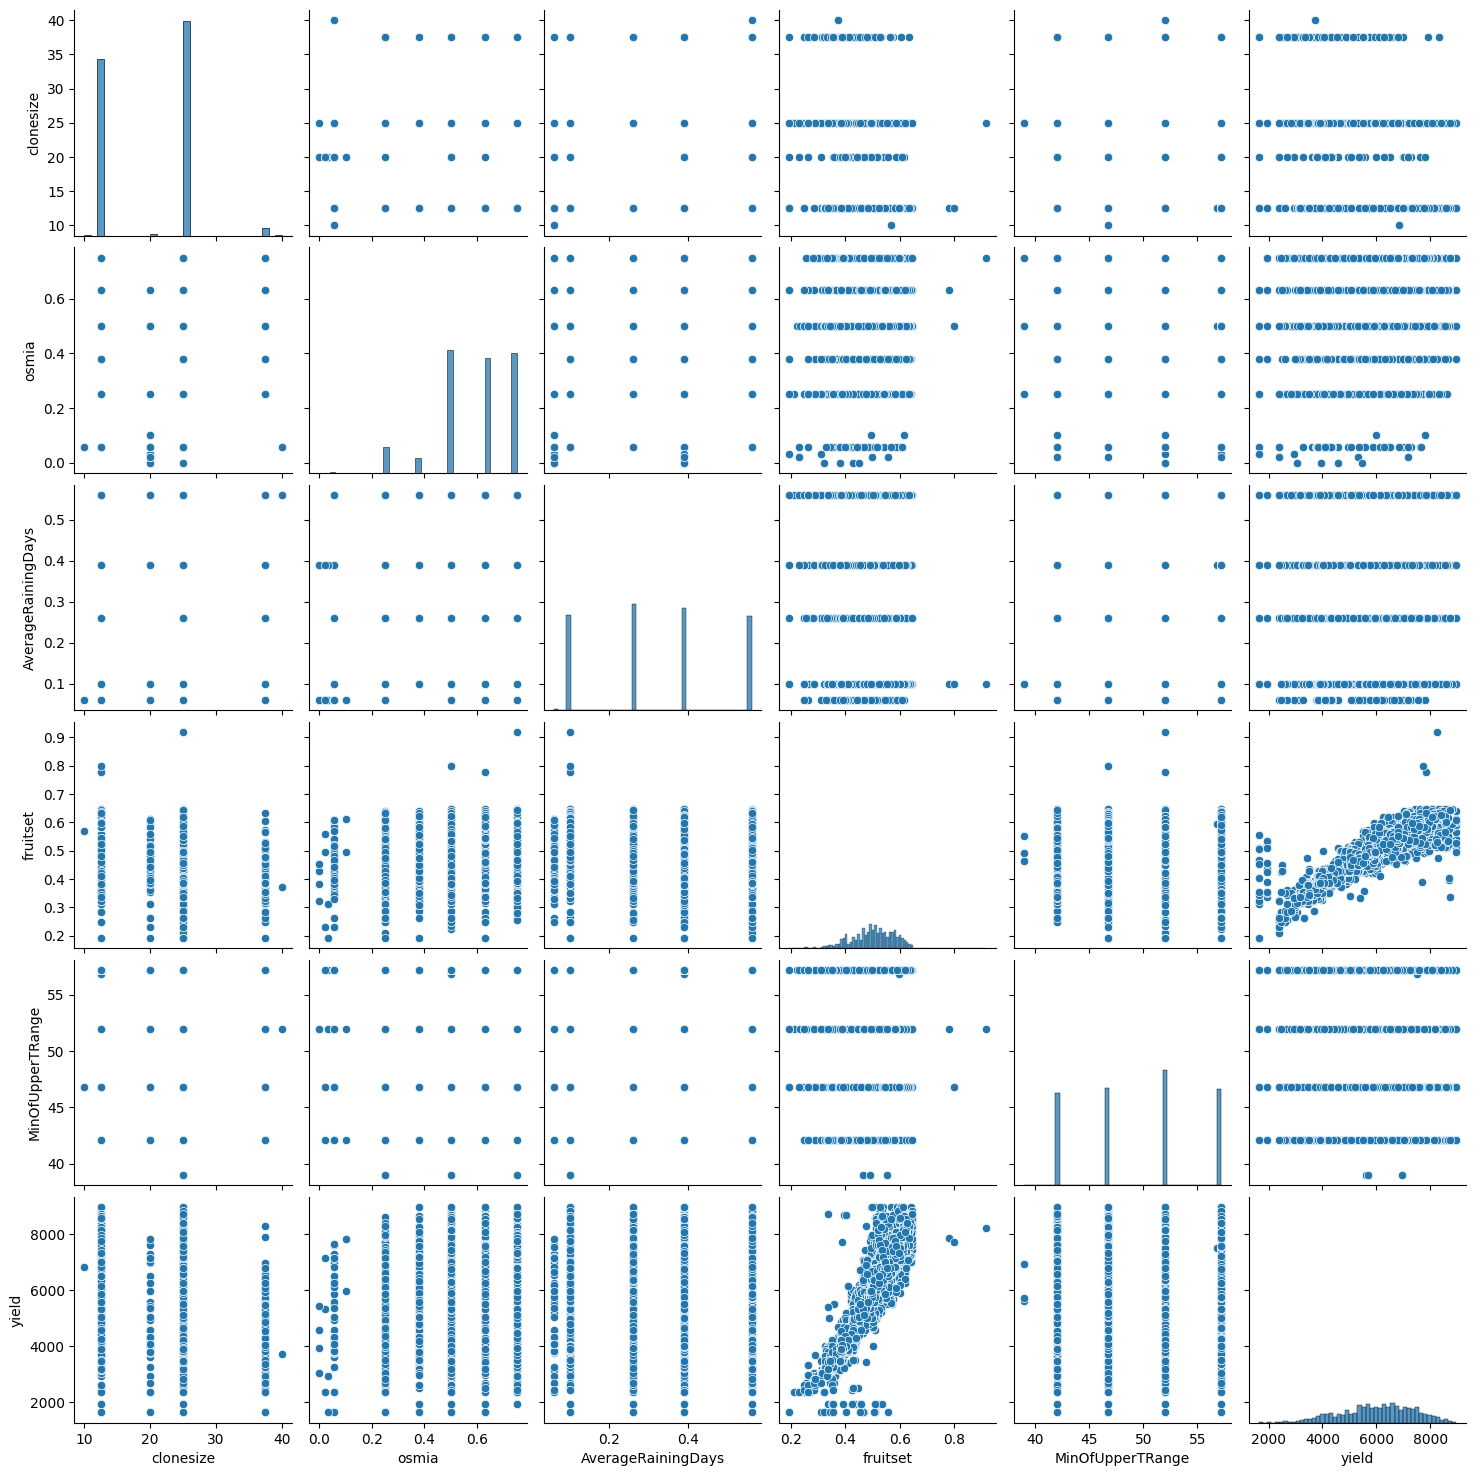

In [4]:
sns.pairplot(df[["clonesize", "osmia", "AverageRainingDays", "fruitset", "MinOfUpperTRange", "yield"]])

From the correlation matrix, we can observe that the features fruitset, fruitmass, seeds have a very high correlation with yield and they also have a high correlation among themselves

In [5]:
df.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,429.028333,19.720333,0.383967,0.285445,0.487979,0.589398,82.223840,49.703600,68.700520,59.267747,28.678920,48.600493,18.689772,0.325415,0.501637,0.446335,36.134737,6033.586197
std,4330.271354,213.858896,6.644401,0.260647,0.059179,0.147186,0.144559,9.080973,5.506574,7.586826,6.562923,3.172043,5.354241,11.826593,0.166033,0.076552,0.038003,4.094260,1349.801334
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.246568,22.079199,1637.704020
25%,3749.750000,248.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.453462,0.418732,33.267137,5128.163510
50%,7499.500000,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.040675,6132.417380
75%,11249.250000,599.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472670,39.158238,7044.567610
max,14999.000000,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,68.200000,34.000000,0.560000,0.917343,0.757564,46.718182,8969.401840


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

The above tells us that the dataset has 17 features without any missing values

# Helper Functions

In [7]:
def mean_absolute_error(y_true, y_pred):
    """
    Function to calculate MAE between y_true (real values) and y_pred (predicted values)
    """
    return np.mean(np.abs(y_true - y_pred))

def evaluate_model(Model, *args, **kwargs):
    """
    Function to create a regressor of type Model, fit train data and return MAE for test data
    For OLSRegressor, it considers _o suffixed variable names
    For KernelRegressor, it considers others
    """
    o = (Model == OLSRegressor)
    regr = Model(*args, **kwargs)
    if o:
        regr.fit(X_train_o, y_train_o)
        y_pred = regr.predict(X_test_o)
        return mean_absolute_error(y_test_o, y_pred)
    else:
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test) ** (1 / exp)
        return mean_absolute_error(y_test, y_pred)

def get_preds(Model, *args, **kwargs):
    """
    Function to create a regressor of type Model, fit train data and return predictions for test data
    For OLSRegressor, it considers _o suffixed variable names
    For KernelRegressor, it considers others
    """
    o = (Model == OLSRegressor)
    regr = Model(*args, **kwargs)
    if o:
        regr.fit(X_train_o, y_train_o)
        y_pred = regr.predict(X_test_o)
    else:
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test) ** (1 / exp)
    return y_pred

# OLSRegressor Class

In [8]:
class OLSRegressor:    
    """
    Class to perform Ordinary Least Squares regression
    """
    
    def _extend_one(self, X):
        """
        Add a column at the start for intercepts
        """
        X0 = np.ones((X.shape[0], 1))
        return np.hstack((X0, X))
    
    def fit(self, X, y):
        """
        Compute coefficients using OLS
        """
        X = self._extend_one(np.array(X))
        y = np.array(y)
        self.B = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        """
        Compute predictions using computed coefficients
        Must be called after fit
        """
        X = np.array(X)
        X = self._extend_one(X)
        return X @ self.B

# Making relation between fruitset and yield linear

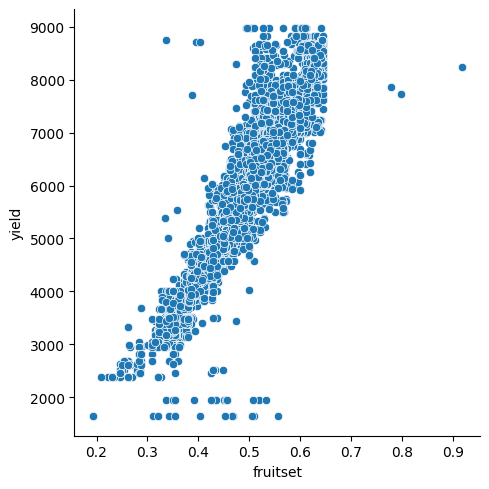

In [9]:
sns.relplot(data=df, x="fruitset", y="yield")

The plot of yield against fruitset tells us that their relation is somewhat polynomial, since the plot is curved. If we assume that yield is some power of fruitset, then we can find it by getting a linear relation between log(fruitset) and log(yield) using OLSRegressor

In [10]:
logfit = OLSRegressor()
logfit.fit(np.log(df)[["yield"]], np.log(df)["fruitset"])
logfit.B

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([-6.09917987,  0.62197655])

The above tells us that
$\log(\text{fruitset}) = 0.62197655 \times \log(\text{fruitset}) - 6.09917987$<br>
So, if we consider yield$^{0.62197655}$ as a linear function of fruitset, we might get more accurate results for Kernel Regression, where we are considering only fruitset<br>
For OLS though, it might give worse off results, and it actually does as tested by us

In [11]:
exp = logfit.B[1]

# Train-Test Split

In [12]:
features = ["fruitset"]
# df_feat = df.drop("id",axis=1).drop("yield",axis=1)
df_feat = df.drop("id",axis=1).drop("yield",axis=1).drop("MaxOfLowerTRange",axis=1).drop("AverageOfLowerTRange",axis=1).drop("AverageOfUpperTRange",axis=1).drop("fruitmass",axis=1)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(df_feat, df["yield"], test_size=0.20, random_state=69) # for OLS
X_train, X_test, y_train, y_test = X_train_o[features], X_test_o[features], y_train_o ** exp, y_test_o # for Kernel

In [13]:
evaluate_model(OLSRegressor)

272.2046871359749

# KernelRegressor class, and various Kernel Functions

In [14]:
class KernelRegressor:
    """
    Class to perform Nadaraya–Watson kernel regression
    """
    def __init__(self, K, h=1.0):
        """
        K: the kernel function
        h: bandwidth
        """
        self.K = K
        self.h = h
    
    def fit(self, X, y):
        """
        Store X_train, y_train to compute weights
        """
        self.X_train = np.array(X)[np.newaxis, :, :]
        self.y_train = np.array(y)
        
    def predict(self, X):
        """
        Compute predictions using Nadaraya-Watson regression
        """
        X = np.array(X)[:,np.newaxis, :]
        w = (X - self.X_train) / self.h
        w = np.linalg.norm(w, axis=2)
        w = self.K(w)
        w_sums = w.sum(axis=1, keepdims=True)
        w_sums[w_sums == 0] = 1.0
        w = w / w_sums
        return (w @ self.y_train)

In [15]:
def gaussian_kernel(x):
    """
    Gaussian kernel function
    """
    return np.exp(-np.square(x) / 2) / np.sqrt(2 * np.pi)

In [16]:
def epanechnikov_kernel(x):
    """
    Epanechnikov kernel function
    """
    a = np.square(x)
    return (3 / 4) * np.where(a <= 1, 1 - np.square(a), 0)

In [17]:
def sandy_kernel(x):
    """
    Kernel function thought about my our team member, Sandeep
    """
    return np.exp(-np.abs(x)) / 2

# Finding optimal bandwidth for the Kernel Functions
This is done using linear search, the value ranges have been manually figured out via manual brute-force, to reduce runtime at submission

In [18]:
import concurrent
import itertools

def eval_at_h(tup):
    h, K, div = tup
    return (evaluate_model(KernelRegressor, K, h / div), h / div)

def search_h(K, l, h, div):
    with concurrent.futures.ProcessPoolExecutor() as pool:
        ans = pool.map(eval_at_h, zip(range(l, h), itertools.repeat(K), itertools.repeat(div)))
    return min(list(ans))

In [19]:
# Finding the bandwidth which gives minimum MAE for Sandy Kernel
mae_sand, h_sand = search_h(sandy_kernel, 50, 100, 100000)
print(f"With Sandy Kernel, Minimum MAE of {mae_sand} is achieved with h={h_sand}")

With Sandy Kernel, Minimum MAE of 262.44608178064334 is achieved with h=0.00074


In [20]:
# Finding the bandwidth which gives minimum MAE for Gaussian Kernel
mae_gauss, h_gauss = search_h(gaussian_kernel, 50, 100, 100000)
print(f"With Gaussian Kernel, Minimum MAE of {mae_gauss} is achieved with h={h_gauss}")

With Gaussian Kernel, Minimum MAE of 262.92095731961166 is achieved with h=0.00093


In [21]:
# Finding the bandwidth which gives minimum MAE for Epanechnikov Kernel
mae_epan, h_epan = search_h(epanechnikov_kernel, 220, 260, 100000)
print(f"With Epanechnikov Kernel, Minimum MAE of {mae_epan} is achieved with h={h_epan}")

With Epanechnikov Kernel, Minimum MAE of 267.5554833691622 is achieved with h=0.00242


# Ensemble Fitting
We are taking a weighted combination of the four Regressors that we've implemented. The weights are decided using OLSRegressor

In [22]:
epan_pred = get_preds(KernelRegressor, epanechnikov_kernel, h_epan)
gauss_pred = get_preds(KernelRegressor, gaussian_kernel, h_gauss)
sand_pred = get_preds(KernelRegressor, sandy_kernel, h_sand)
ols_pred = get_preds(OLSRegressor)

In [23]:
ensemble = OLSRegressor()
ensemble.fit(np.array([epan_pred, gauss_pred, sand_pred, ols_pred]).T, np.array(y_test))

In [24]:
y_pred = ensemble.predict(np.array([epan_pred, gauss_pred, sand_pred, ols_pred]).T)
print("This achieves an MAE of", mean_absolute_error(y_test, y_pred))

This achieves an MAE of 259.1935363005251


# Final Submission

In [25]:
# Making final submission
X_train_o, y_train_o = df_feat, df["yield"]
test_df = pd.read_csv("/kaggle/input/cs-215-assignment-3-multiple-variate-regression/test.csv")

test_id = test_df["id"]
X_test_o = test_df.drop("id",axis=1).drop("MaxOfLowerTRange",axis=1).drop("AverageOfLowerTRange",axis=1).drop("AverageOfUpperTRange",axis=1).drop("fruitmass",axis=1)

X_train, X_test, y_train = X_train_o[features], X_test_o[features], y_train_o ** exp

epan_pred = get_preds(KernelRegressor, epanechnikov_kernel, h_epan)
gauss_pred = get_preds(KernelRegressor, gaussian_kernel, h_gauss)
sand_pred = get_preds(KernelRegressor, sandy_kernel, h_sand)
ols_pred = get_preds(OLSRegressor)

y_pred = ensemble.predict(np.array([epan_pred, gauss_pred, sand_pred, ols_pred]).T)
submission = pd.DataFrame({'id': test_id, 'yield': y_pred})
submission.to_csv('submission.csv', index=False)